In [1]:
import importlib
import time
import pandas as pd
import numpy as np
import datetime
import shutil

from MERFISH_Objects.execute_class import *

import logging
logging.basicConfig(format='%(asctime)s - %(message)s', 
                    datefmt='%m-%d %H:%M:%S', 
                    level=logging.INFO,
                    )

2022-08-25 15:06:02,369 [INFO] WRITING LOG OUTPUT TO /home/fangming/.cellpose/run.log


In [2]:
def savefig(fig, path):
    """
    """
    fig.savefig(path, bbox_inches='tight', dpi=300)
    return 

def savefig_autodate(fig, path):
    """
    """
    today = datetime.today().date()
    suffix = path[-3:]
    assert suffix in ['pdf', 'png', 'jpg']
    path = path.replace(f'.{suffix}', f'_{today}.{suffix}')
    savefig(fig, path)
    print(f"saved the figure to: {path}")
    return 

def plot_image_with_zoom(img, x_window, y_window, vmin_p=0, vmax_p=100, title='', output=None):
    """
    """
    vmin,vmax = np.percentile(img.ravel(),[vmin_p, vmax_p])

    fig, axs = plt.subplots(1, 2, figsize=(10*2,10*1))
    for ax in axs:
        ax.set_title(title)
        g = ax.imshow(img,vmin=vmin,vmax=vmax,cmap='jet')

    ax = axs[0]
    ax.hlines(y_window, xmin=x_window[0], xmax=x_window[1], color='white')
    ax.vlines(x_window, ymin=y_window[0], ymax=y_window[1], color='white')

    ax = axs[1]
    ax.set_xlim(x_window)
    ax.set_ylim(y_window)
    fig.colorbar(g, shrink=0.5, ax=ax)
    if output is not None:
        savefig_autodate(fig, output)
    plt.show()

In [3]:
### input
figdir = '/bigstore/GeneralStorage/fangming/projects/test_merfish/figures'
metadata_path = '/bigstore/Images2022/Gaby/Zebrafinch/C0_2022Jul25/'
cword_config = 'merfish_config_zebrafinch_18bits_C0July25'
config = importlib.import_module(cword_config)

overwrite = False

In [4]:
dataset = [i for i in metadata_path.split('/') if not i==''][-1]
parameters = config.parameters
fishdata_path = os.path.join(metadata_path, parameters['fishdata'])
utilities_path = parameters['utilities_path']
bitmap = config.bitmap

for key in parameters:
    if key.endswith('path') or key.endswith('data'):
        print(key, parameters[key])
        
nuclei = [i for i in os.listdir(metadata_path) if 'nucstain' in i][-1]
print(nuclei)
hybe1 = [i for i in os.listdir(metadata_path) if 'hybe1_' in i][-1]
print(hybe1)

image_metadata_nuc = Metadata(os.path.join(metadata_path, nuclei))
print(image_metadata_nuc.posnames.shape)
image_metadata = Metadata(os.path.join(metadata_path, hybe1))
print(image_metadata.posnames.shape)

posnames = image_metadata_nuc.posnames

x_window = [500,750]
y_window = [1000,1250]

daemon_path /scratch/test_daemon_FX_18bits_C0July25
utilities_path /scratch/test_utility_FX_18bits_C0July25
fishdata fishdata_testFX_18bits
nucstain_26
hybe1_1
(150,)
(150,)


# commit to 1 pos

In [5]:
posname = '6-Pos004_003'
# # need to clean up temporary folder
# if overwrite:
#     try:
#         shutil.rmtree(fishdata_path)
#     except Exception as e:
#         print(e)
#     try:
#         shutil.rmtree(utilities_path)
#     except Exception as e:
#         print(e)

2022-08-25 15:06:11,071 [INFO] /bigstore/GeneralStorage/fangming/projects/test_merfish/figures/fig1-1_dapi_C0_2022Jul25_6-Pos004_003.pdf
saved the figure to: /bigstore/GeneralStorage/fangming/projects/test_merfish/figures/fig1-1_dapi_C0_2022Jul25_6-Pos004_003_2022-08-25.pdf


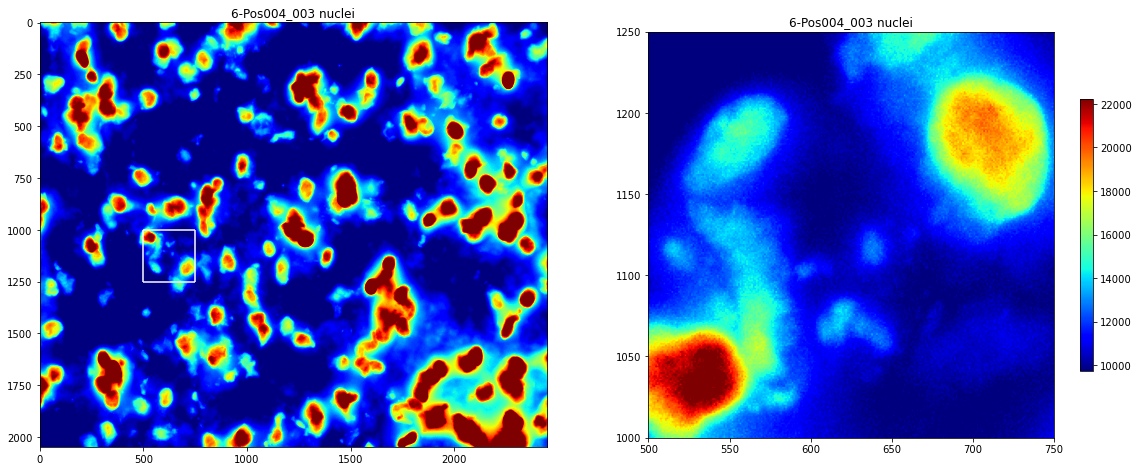

2022-08-25 15:06:25,972 [INFO] /bigstore/GeneralStorage/fangming/projects/test_merfish/figures/fig1-2_polyT_C0_2022Jul25_6-Pos004_003.pdf
saved the figure to: /bigstore/GeneralStorage/fangming/projects/test_merfish/figures/fig1-2_polyT_C0_2022Jul25_6-Pos004_003_2022-08-25.pdf


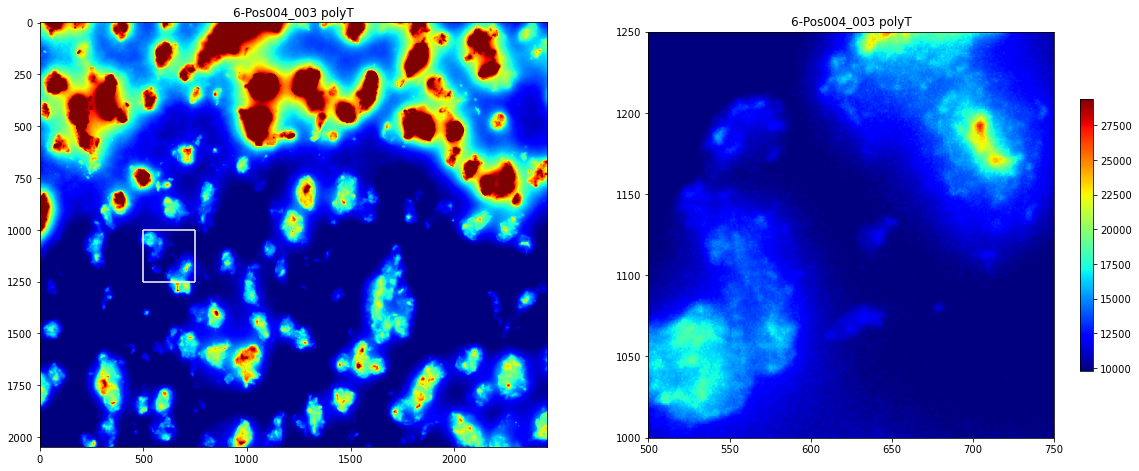

In [6]:
img_nuc = image_metadata_nuc.stkread(Position=posname, Channel='DeepBlue').max(2) # max across z?
output = os.path.join(figdir, f'fig1-1_dapi_{dataset}_{posname}.pdf')
logging.info(output)
plot_image_with_zoom(img_nuc, x_window, y_window, vmin_p=25, vmax_p=95, title=posname+" nuclei", 
                     output=output,
                    )

img_poly = image_metadata_nuc.stkread(Position=posname, Channel='FarRed').max(2) # max across z?
output = os.path.join(figdir, f'fig1-2_polyT_{dataset}_{posname}.pdf')
logging.info(output)
plot_image_with_zoom(img_poly, x_window, y_window, vmin_p=25, vmax_p=95, title=posname+" polyT",
                     output=output,
                    )

In [ ]:
%%time
# init takes sometime
self = Dataset_Class(metadata_path, dataset, cword_config, verbose=True)
self.main()

15:06:30 Checking Imaging: 0it [00:00, ?it/s]
15:06:30 Checking Hot Pixel: 0it [00:00, ?it/s]
15:06:30 Loading Metadata: 0it [00:00, ?it/s]
15:06:35 Finding Hot Pixels: 0it [00:00, ?it/s]
15:06:35 Finding Hot Pixels:  50%|█████     | 5/10 [19:00<22:18, 267.67s/it]

In [ ]:
def pfunc_reg(hybe, metadata_path, dataset, posname, cword_config):
    self = Registration_Class(metadata_path,dataset,posname,hybe,cword_config,verbose=False)
    self.find_beads()

def pfunc_img(data, metadata_path, dataset, posname, cword_config):
    hybe = data['hybe']
    channel = data['channel']
    zindex = data['zindex']
    self = Image_Class(metadata_path,dataset,posname,hybe,channel,zindex,cword_config,verbose=False)
    self.main()

In [ ]:
%%time
# def pfunc(hybe):
#     self = Registration_Class(metadata_path,dataset,posname,hybe,cword_config,verbose=False)
#     self.find_beads()
    
# # takes some time
# Input = [hybe for readout_probe,hybe,channel in bitmap if not hybe==parameters['ref_hybe']]
# pfunc(parameters['ref_hybe'])
# ncpu = 10
# pool = multiprocessing.Pool(ncpu)
# sys.stdout.flush()
# results = pool.imap(pfunc, Input)
# iterable = tqdm(results,total=len(Input),desc=str(datetime.now().strftime("%H:%M:%S"))+' '+dataset,position=0)
# for i in iterable:
#     pass
# pool.close()
# sys.stdout.flush()

# Registration 
Input = [hybe for readout_probe,hybe,channel in bitmap if not hybe==parameters['ref_hybe']]
for i in Input:
     pfunc_reg(i, metadata_path, dataset, posname, cword_config)
        
# pfunc_reg(parameters['ref_hybe'])
# ncpu = 10
# p = multiprocessing.Pool(ncpu)
# for i in Input:
#     p.apply_async(pfunc_reg, args=(i, metadata_path, dataset, posname, cword_config))
# p.close()
# p.join()

In [ ]:
%%time

# def pfunc(data):
#     hybe = data['hybe']
#     channel = data['channel']
#     zindex = data['zindex']
#     self = Image_Class(metadata_path,dataset,posname,hybe,channel,zindex,cword_config,verbose=False)
#     self.main()
    
# Input = []
# hybe = 'hybe2'
# channel = 'FarRed'
# self = Stack_Class(metadata_path,dataset,posname,hybe,channel,cword_config,verbose=False)
# self.check_projection()
# zindexes = self.zindexes
# for readout_probe,hybe,channel in bitmap:
#     for zindex in zindexes:
#         data = {'hybe':hybe,'channel':channel,'zindex':zindex}
#         Input.append(data)

# ncpu = 30
# pool = multiprocessing.Pool(ncpu)
# sys.stdout.flush()
# results = pool.imap(pfunc, Input)
# iterable = tqdm(results,total=len(Input),desc=str(datetime.now().strftime("%H:%M:%S"))+' '+dataset,position=0)
# for i in iterable:
#     pass
# pool.close()
# sys.stdout.flush()

Input = []
hybe = 'hybe2'
channel = 'FarRed'
self = Stack_Class(metadata_path,dataset,posname,hybe,channel,cword_config,verbose=False)
self.check_projection()
zindexes = self.zindexes
for readout_probe,hybe,channel in bitmap:
    for zindex in zindexes:
        data = {'hybe':hybe,'channel':channel,'zindex':zindex}
        Input.append(data)

ncpu = 10
p = multiprocessing.Pool(ncpu)
for i in Input:
    p.apply_async(pfunc_img, args=(i, metadata_path, dataset, posname, cword_config))
p.close()
p.join()

In [ ]:
# work out the parallel scheme
# def addab(a, b=100):
#     print(f"{a+b},", end='')
#     return a+b

# alla = np.arange(10)
# allb = np.arange(10)+100

# with multiprocessing.Pool(10) as p:
#     # print(p.map(addab, alla))
#     # print(p.apply_async(addab, args=alla, kwds=dict(b=2)))
#     bs = []
#     for a in alla:
#         p.apply_async(addab, args=(a), kwds={'b':5})

In [ ]:
nbits = len(bitmap)
Input = []
hybe = 'hybe2'
channel = 'FarRed'
self = Stack_Class(metadata_path,dataset,posname,hybe,channel,cword_config,verbose=False)
self.check_projection()
zindexes = self.zindexes

In [ ]:
%%time
zindex = str(zindexes[0])
# stks = {}
# raw_dapis = {}

rawimgs = {}
imgs = {}
spots_coords = {}
spots_coords_v2 = {}

for i, (readout,hybe,channel) in enumerate(bitmap):
    print(readout,hybe,channel)
    """ Processed Image Zoom"""
    # self = Image_Class(metadata_path,dataset,posname,hybe,'DeepBlue',zindex,cword_config,verbose=False)
    # self.load_data() # sub_stk
    # self.project() # max projection
    # raw_dapis[i] = self.img # are these correct?
    
    self = Image_Class(metadata_path,dataset,posname,hybe,channel,zindex,cword_config,verbose=False)
    self.load_data() # sub_stk
    # stks[i] = self.sub_stk
    self.project() # max projection
    rawimgs[i] = self.img
    
    fish_img = self.fishdata.load_data('image',
                                        dataset=self.dataset,
                                        posname=self.posname,
                                        hybe=self.hybe,
                                        channel=self.channel,
                                        zindex=self.zindex)/self.parameters['gain']
    imgs[i] = fish_img
    self.img = fish_img # trying this and see; this is important
    
    self.parameters['spot_max_distance'] = 3#self.parameters['spot_parameters']['default']['spot_max_distance']
    self.parameters['spot_minmass'] = 5#self.parameters['spot_parameters']['default']['spot_minmass']
    self.parameters['spot_diameter'] = 5#self.parameters['spot_parameters']['default']['spot_diameter']
    self.parameters['spot_separation'] = 3#self.parameters['spot_parameters']['default']['spot_separation']
    self.call_spots()
    spots_coords[i] = np.vstack([self.spots.x, self.spots.y]).T

    self.parameters['spot_max_distance'] = 3#self.parameters['spot_parameters']['default']['spot_max_distance']
    self.parameters['spot_minmass'] = 10#self.parameters['spot_parameters']['default']['spot_minmass']
    self.parameters['spot_diameter'] = 5#self.parameters['spot_parameters']['default']['spot_diameter']
    self.parameters['spot_separation'] = 3#self.parameters['spot_parameters']['default']['spot_separation']
    self.call_spots()
    spots_coords_v2[i] = np.vstack([self.spots.x, self.spots.y]).T

In [ ]:
output = os.path.join(figdir, f'fig2-1_raw_{dataset}_{posname}.pdf')
logging.info(output)

fig, axs = plt.subplots(3,6,figsize=(4*6,4*3), sharex=True, sharey=True)
for i, ax in zip(rawimgs.keys(), axs.flat):
    img = rawimgs[i]
    vmin = np.percentile(img.reshape(-1,), 50)
    vmax = np.percentile(img.reshape(-1,), 95)
    g = ax.imshow(img, cmap='jet', vmin=vmin, vmax=vmax, rasterized=True)
    ax.set_aspect('equal')
    ax.set_title(f'bit{i}')
    fig.colorbar(g, ax=ax, shrink=0.5, location='bottom', pad=0.05, fraction=0.05, ticks=[vmin, vmax])
fig.subplots_adjust(wspace=0)
fig.suptitle(f"Raw images (Max projected) {posname}", y=0.92)
savefig_autodate(fig, output)
plt.show()

In [ ]:
output = os.path.join(figdir, f'fig2-2_proc_{dataset}_{posname}.pdf')
logging.info(output)

fig, axs = plt.subplots(3,6,figsize=(4*6,4*3), sharex=True, sharey=True)
for i, ax in zip(imgs.keys(), axs.flat):
    img = imgs[i]
    vmin = np.percentile(img.reshape(-1,), 50)
    vmax = np.percentile(img.reshape(-1,), 95)
    g = ax.imshow(img, cmap='jet', vmin=vmin, vmax=vmax, rasterized=True)
    ax.set_aspect('equal')
    ax.set_title(f'bit{i}')
    fig.colorbar(g, ax=ax, shrink=0.5, location='bottom', pad=0.05, fraction=0.05, ticks=[vmin, vmax])
fig.subplots_adjust(wspace=0)
fig.suptitle(f"FISHdata Images {posname}", y=0.92)
savefig_autodate(fig, output)
plt.show()

In [ ]:
output = os.path.join(figdir, f'fig2-3_spots_{dataset}_{posname}.pdf')
logging.info(output)

fig, axs = plt.subplots(3,6,figsize=(4*6,4*3), sharex=True, sharey=True)
for i, ax in zip(spots_coords.keys(), axs.flat):
    spots = spots_coords[i]
    ax.scatter(spots[:,0], spots[:,1], s=2, edgecolor='none', rasterized=True)
    ax.set_aspect('equal')
    ax.set_title(f'bit{i}')
fig.subplots_adjust(wspace=0)
fig.suptitle(f"Spots {posname}", y=0.92)
savefig_autodate(fig, output)
plt.show()

In [ ]:
# fig, axs = plt.subplots(3,6,figsize=(4*6,4*3), sharex=True, sharey=True)
# for i, ax in zip(spots_coords.keys(), axs.flat):
#     spots = spots_coords_v2[i]
#     ax.scatter(spots[:,0], spots[:,1], s=2, edgecolor='none')
#     ax.set_aspect('equal')
#     ax.set_title(f'bit{i}')
# fig.subplots_adjust(wspace=0)
# fig.suptitle(f"Spots {posname}", y=0.92)
# savefig_autodate(fig, output)
# plt.show()

In [ ]:
# fig, axs = plt.subplots(3,6,figsize=(4*6,4*3), sharex=True, sharey=True)
# for i, ax in zip(spots_coords.keys(), axs.flat):
#     spots = spots_coords[i]
#     ax.scatter(spots[:,0], spots[:,1], s=5, edgecolor='none')
#     ax.set_aspect('equal')
#     ax.set_title(f'bit{i}')
#     ax.set_xlim(x_window)
#     ax.set_ylim(y_window)
# fig.subplots_adjust(wspace=0)
# fig.suptitle("Zoomed in", y=0.92)
# savefig_autodate(fig, output)
# plt.show()

In [ ]:
# %%time
# self = Classify_Class(metadata_path,dataset,posname,zindex,cword_config,verbose=True)
# self.parameters['spot_max_distance'] = 20
# self.parameters['spot_minmass'] = 5
# self.parameters['spot_diameter'] = 5
# self.parameters['spot_separation'] = 5

# self.call_spots()
# self.pair_spots()
# self.build_barcodes()
# self.assign_codewords()

In [ ]:
# self.collapse_spots()